In [78]:
from google.colab import drive

drive.mount('/content/drive')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
sns.set() 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
ttrain=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
ttest=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

ttrain.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


학습데이터 set 상위 5개 출력

In [89]:
train.shape

(891, 9)

In [90]:
test.shape

(418, 8)

In [51]:
ttrain.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


학습데이터 set 각필드 데이터 분포 살펴보기 ( 평균, 최소값, 최대값 ...

In [52]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info 메소드를 통해서 각 컬럼의 데이터type 과 개수를 확인 할 수있다. 
일부 컬럼은 데이터 누락. Name,Sex,Ticket,Cabin,Embarked

In [53]:
ttrain.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [54]:
ttrain.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

null값 포함 여부

In [55]:
ttrain['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

생존자,사망자 수 확인
Survived = 1 ,Dead = 0
_사망자가 생존자의 약 두배

In [56]:
ttrain['Pclass'].value_counts().sort_index()


1    216
2    184
3    491
Name: Pclass, dtype: int64

좌석 등급별 탑승객 분포확인. (3>1>2)


In [57]:
ttrain['Sex'].value_counts().sort_index()


female    314
male      577
Name: Sex, dtype: int64

성별 탑승객 분포 확인. (남>여)

In [58]:
ttrain['Embarked'].value_counts().sort_index()

C    168
Q     77
S    644
Name: Embarked, dtype: int64

탑승 위치별 분포확인. (S>C>Q)

In [59]:
ttrain['Name'].value_counts().sort_index()

Abbing, Mr. Anthony                      1
Abbott, Mr. Rossmore Edward              1
Abbott, Mrs. Stanton (Rosa Hunt)         1
Abelson, Mr. Samuel                      1
Abelson, Mrs. Samuel (Hannah Wizosky)    1
                                        ..
de Mulder, Mr. Theodore                  1
de Pelsmaeker, Mr. Alfons                1
del Carlo, Mr. Sebastiano                1
van Billiard, Mr. Austin Blyler          1
van Melkebeke, Mr. Philemon              1
Name: Name, Length: 891, dtype: int64

In [60]:
ttrain['Ticket'].value_counts().sort_index()

110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Ticket, Length: 681, dtype: int64

In [63]:
ttrain = ttrain.drop(['Name', 'Ticket', 'Cabin'], axis=1)
ttrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
ttest = ttest.drop(['Name','Ticket', 'Cabin'], axis=1)
ttest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


Name, Ticket, Cabin 컬럼 drop함.

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

In [96]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

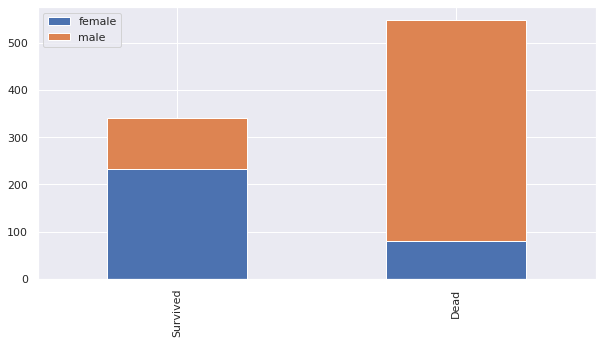

In [97]:
bar_chart('Sex')

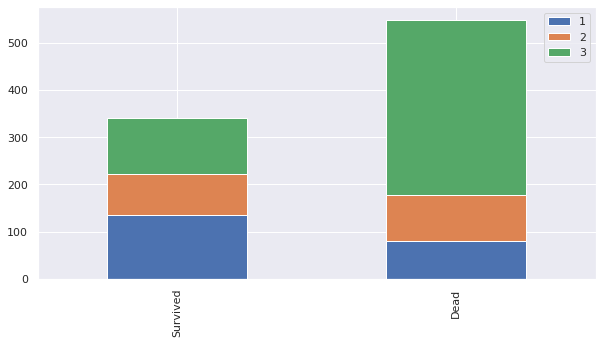

In [98]:
bar_chart('Pclass')

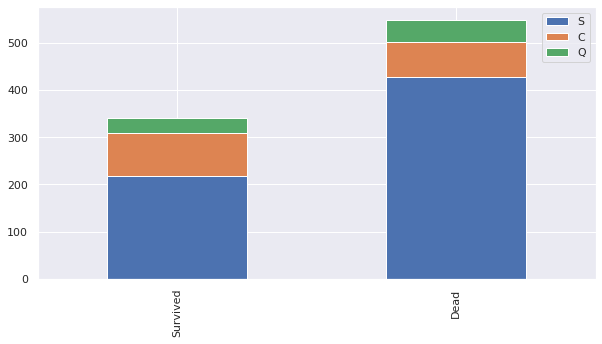

In [99]:
bar_chart('Embarked')

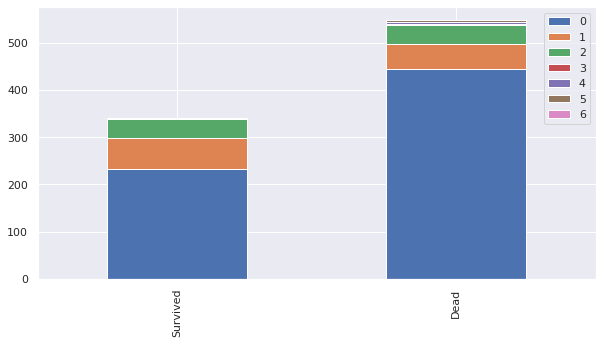

In [100]:
bar_chart('Parch')

In [130]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

남자, 여자 텍스트를 숫자 0과1로 변환.

In [115]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Sex']

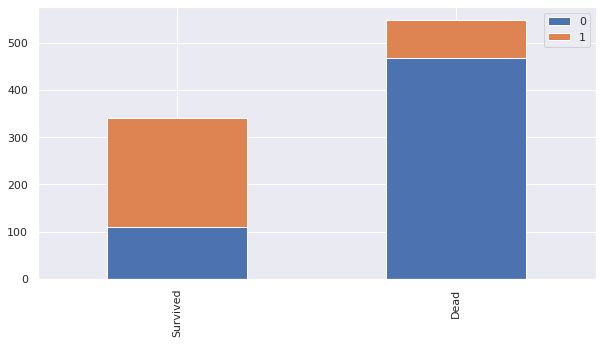

In [132]:
bar_chart('Title')

남자, 여자 텍스트를 숫자 0과1로 변환.

In [134]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)